In [4]:
class Location:

    """
    The following class should contain the following information 
    - The longitude of the location
    - The latitude of the location
    
    The class should have appropriate constructor, getters and setters     
    """
    def __init__(self,longitude,latitude):
        self.longitude = longitude
        self.latitude = latitude

    def set_longitude(self,longitude):
        self.longitude = longitude

    def get_longitude(self):
        return self.longitude

    def set_latitude(self,latitude):
        self.latitude = latitude

    def get_latitude(self):
        return self.latitude

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import List, Tuple
from scipy.spatial import ConvexHull

def check_location_is_on_edge(point, edge: Tuple[Location, Location]) -> bool:
    x, y = point
    p1, p2 = edge
    x1, y1 = p1.get_longitude(), p1.get_latitude()
    x2, y2 = p2.get_longitude(), p2.get_latitude()

    #Check if the point is co-linear with the edge
    if (x2-x1) * (y-y1) != (y2-y1) * (x-x1):
        return False
    
    #Check if the point is between the points
    if min(x1, x2) <= x <= max(x1, x2) and min(y1, y2) <= y <= max(y1,y2):
        return True 
    else:
        return False

def check_location_is_within_area(point, polygon):
    xp, yp = point

    points = polygon

    #Calculate the Convex hull to ensure a complete perimeter
    hull = ConvexHull(points)

    vertices = [points[vertex] for vertex in hull.vertices]
    vertices.append(vertices[0])
    edges = [(vertices[i], vertices[i+1]) for i in range(len(vertices)-1)]

    counter = 0

    for edge in edges:
        #If the point is on the edge, it is immediately in the area
        if check_location_is_on_edge(point, (Location(*edge[0]), Location(*edge[1]))):
            return True
        
        (x1, y1), (x2, y2) = edge

        #Algorithm to check if the point intersects, the edge, increments counter if it does
        if (yp < y1) != (yp < y2) and xp < x1 +((yp-y1)/(y2-y1)) * (x2-x1):
            counter += 1
    
    return counter%2 == 1
    

# checks to see if path point is within the boundary
def is_point_in_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside


def generate_random_walk_within_boundary(grid_size, num_steps, boundary_path):
    # The start position is the first point of the boundary path
    start_position = boundary_path[0]
    path = [start_position]

    moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    current_position = start_position

    # print("Starting random walk generation...")

    for step in range(num_steps):
        valid_move_found = False
        while not valid_move_found:
            move = random.choice(moves)
            new_position = (current_position[0] + move[0], current_position[1] + move[1])
            # print("new position: ", new_position)

            new_position = (
                max(0, min(grid_size - 1, new_position[0])),
                max(0, min(grid_size - 1, new_position[1]))
            )

            # print("checking whether point is in polygon")

            if check_location_is_within_area(new_position, boundary_path):
                # print("point is in polygon")
                valid_move_found = True
                path.append(new_position)
                current_position = new_position
            else:
                # print("point is outside of polygon")
                pass

        if step % 100 == 0:
            # print(f"Step {step} complete. Current position: {current_position}")
            pass

    path.append(start_position)
    print("Random walk generation complete.")
    return path


# plots the path within the given boundary
def plot_path_with_boundary(path, boundary_path, grid_size):
    x, y = zip(*path)
    bx, by = zip(*boundary_path)

    plt.figure(figsize=(10, 10))

    plt.plot(x, y, marker='o', linestyle='-', color='blue', markersize=3, label='Path')
    plt.plot([x[-2], x[-1]], [y[-2], y[-1]], 'r--', linewidth=2, label='Return to Start')
    plt.plot(x[0], y[0], 'go', markersize=10, label='Start/End Point')
    plt.plot(bx, by, 'k-', linewidth=2, label='Boundary Path')

    plt.xlim(0, grid_size)
    plt.ylim(0, grid_size)
    plt.title('Random Zoo Walk Path within Custom Boundary')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
    plt.show()

# allows the user to enter a custom boundary by inputting coordinates
def get_user_defined_boundary():
    print("Enter the boundary path as a series of points (x, y).")
    print("Enter 'done' when you have finished inputting points.")
    boundary = []
    while True:
        user_input = input("Enter point (x, y) or 'done': ")
        if user_input.lower() == 'done':
            break
        try:
            x, y = map(int, user_input.split(','))
            boundary.append((x, y))
        except ValueError:
            print("Invalid input. Please enter the point in the format 'x, y'.")

    if len(boundary) < 3:
        print("A valid boundary requires at least three points.")
        return get_user_defined_boundary()

    if boundary[0] != boundary[-1]:
        boundary.append(boundary[0])

    return boundary

# Gets custom boundary path from the user
# boundary_path = get_user_defined_boundary()

# Generates and plots the random walk path within the custom boundary
# path = generate_random_walk_within_boundary(grid_size, num_steps, boundary_path)

# message to confirm path generation
# print("Random walk path generation complete. Path length:", len(path))

Random walk generation complete.
Random walk path generation complete. Path length: 10002


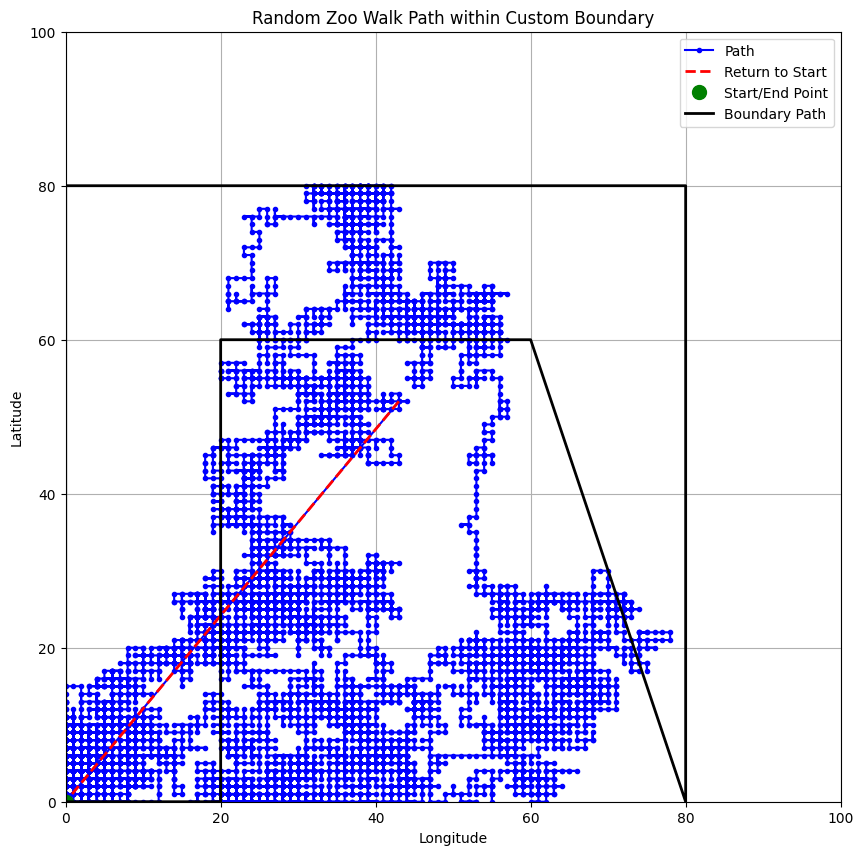

In [68]:
# Gets custom boundary path from the user

boundary_path = [(0,0), (0,80), (80,80), (80,0), (60,60), (20,60), (20,0), (0,0), (0,80)]
# boundary_path = [(0,0), (0,100), (100,100), (100,0), (75,75), (75,0), (25,75), (25,0), (0,0)] 
grid_size = 100
num_steps = 10000

# Generates and plots the random walk path within the custom boundary
path = generate_random_walk_within_boundary(grid_size, num_steps, boundary_path)

# message to confirm path generation
print("Random walk path generation complete. Path length:", len(path))
plot_path_with_boundary(path, boundary_path, grid_size)

In [ ]:
is_point_in_polygon((1,1), boundary_path)

In [13]:
check_location_is_within_area((0,-1), boundary_path)

False